### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
master_frame=pd.read_csv(r'master_frame_clean_file.csv')
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
3,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,HKG
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [3]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88528 entries, 0 to 88527
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   88528 non-null  object 
 1   funding_round_type  88528 non-null  object 
 2   raised_amount_usd   88528 non-null  float64
 3   name                88528 non-null  object 
 4   category_list       88528 non-null  object 
 5   country_code        88528 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.1+ MB


# checkpoints 2 : Funding Type Analysis

In [4]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [5]:
funding_round_type=['venture','seed','angel','private_equity']
master_frame=master_frame.loc[(master_frame.funding_round_type.isin(funding_round_type))]

In [6]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [7]:
master_frame.shape

(75123, 6)

In [8]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


# Average Funding Amount

In [9]:
xyz=round(master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False),2)
xyz1=pd.DataFrame(xyz)
xyz1

,raised_amount_usd
funding_round_type,
private_equity,73938486.28
venture,11724222.69
angel,971573.89
seed,747827.95


In [10]:
xyz2=xyz1[(xyz1['raised_amount_usd']>=5000000)&(xyz1['raised_amount_usd']<=15000000)]
xyz2

,raised_amount_usd
funding_round_type,
venture,11724222.69


# checkpoints 3 : Country Analysis

In [11]:
english_countries=pd.read_csv(r'english_countries.csv')
english_countries.head()

,country_code,official language
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
4,ATG,Yes


In [12]:
master_frame.head(2)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA


In [13]:
master_frame=master_frame.loc[master_frame['funding_round_type']=='venture']

In [14]:
master_frame

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
7,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
8,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
...,...,...,...,...,...,...
88512,/organization/zyraz-technology,venture,7991547.0,Zyraz Technology,Biotechnology,MYS
88515,/organization/zyrra,venture,140500.0,Zyrra,E-Commerce,USA
88517,/organization/zystor,venture,8500000.0,Zystor,Biotechnology,USA
88518,/organization/zytoprotec,venture,2686600.0,Zytoprotec,Biotechnology,AUT


## merging table english countries and master_frame data 

In [15]:
top=pd.merge(master_frame,english_countries,how='inner',on='country_code')

In [16]:
top.columns

Index(['company_permalink', 'funding_round_type', 'raised_amount_usd', 'name',
       'category_list', 'country_code', 'official language'],
      dtype='object')

In [17]:
top.head(2)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,official language
0,/organization/-fame,venture,10000000.0,#fame,Media,IND,No
1,/organization/21diamonds-india,venture,6369507.0,21Diamonds,E-Commerce,IND,No


In [18]:
top1=top.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
top1

country_code
USA    4.200680e+11
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
SGP    2.793918e+09
IRL    1.669286e+09
AUS    1.319029e+09
NZL    4.483164e+08
ZAF    2.337131e+08
NGA    1.834400e+08
PHL    1.144997e+08
PAK    8.312500e+07
KEN    5.394000e+07
GHA    3.120000e+07
MLT    1.772830e+07
KNA    1.500000e+07
TTO    8.500000e+06
UGA    2.500000e+06
BWA    2.250000e+06
MUS    1.500000e+06
CMR    3.595610e+05
Name: raised_amount_usd, dtype: float64

In [19]:
top9=pd.DataFrame(top1)
top9.head(9)    ##### top9 countries #####

,raised_amount_usd
country_code,
USA,4.200680e+11
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
SGP,2.793918e+09
IRL,1.669286e+09
AUS,1.319029e+09
NZL,4.483164e+08
ZAF,2.337131e+08


In [20]:
#### top 3 countries ####
top9.head(3)  

,raised_amount_usd
country_code,
USA,4.200680e+11
GBR,2.007281e+10
IND,1.426151e+10


In [21]:
code=['USA','GBR','IND']
top3=top.loc[(top.country_code.isin(code))]

In [22]:
top3['country_code'].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

In [23]:
top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 40048
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   38803 non-null  object 
 1   funding_round_type  38803 non-null  object 
 2   raised_amount_usd   38803 non-null  float64
 3   name                38803 non-null  object 
 4   category_list       38803 non-null  object 
 5   country_code        38803 non-null  object 
 6   official language   38803 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


# checkpoints 4 : Sector Analysis 1

In [25]:
mapping=pd.read_csv(r'C:\Users\muskan\Desktop\projects DS\project spark fund\mapping.csv')

In [26]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [27]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [28]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [29]:
round(100*mapping.isnull().sum()/len(mapping),2)

category_list                              0.15
Automotive & Sports                        0.00
Blanks                                     0.00
Cleantech / Semiconductors                 0.00
Entertainment                              0.00
Health                                     0.00
Manufacturing                              0.00
News, Search and Messaging                 0.00
Others                                     0.00
Social, Finance, Analytics, Advertising    0.00
dtype: float64

In [30]:
mapping.isnull().all()

category_list                              False
Automotive & Sports                        False
Blanks                                     False
Cleantech / Semiconductors                 False
Entertainment                              False
Health                                     False
Manufacturing                              False
News, Search and Messaging                 False
Others                                     False
Social, Finance, Analytics, Advertising    False
dtype: bool

In [31]:
mapping.isnull().all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
683    False
684    False
685    False
686    False
687    False
Length: 688, dtype: bool

### cleaning mapping file

In [32]:
mapping=mapping[~mapping['category_list'].isnull()]

In [33]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [34]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [35]:
round(100*mapping.isnull().sum()/len(mapping),2)

category_list                              0.0
Automotive & Sports                        0.0
Blanks                                     0.0
Cleantech / Semiconductors                 0.0
Entertainment                              0.0
Health                                     0.0
Manufacturing                              0.0
News, Search and Messaging                 0.0
Others                                     0.0
Social, Finance, Analytics, Advertising    0.0
dtype: float64

In [36]:
mapping['category_list']=mapping['category_list'].apply(lambda x:x.split('|')[0])

In [37]:
mapping['category_list'].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bankin

In [38]:
len(mapping['category_list'])

687

In [39]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [40]:
mapping1=pd.melt(mapping,id_vars=['category_list'],var_name=['main sector'])

In [41]:
mapping1

,category_list,main sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [42]:
##### filter the rows with value more than 0
mapping1=mapping1.loc[mapping1['value']>0] 

In [43]:
mapping1

,category_list,main sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [44]:
mapping1.reset_index(drop='index',inplace=True)

In [45]:
mapping1

,category_list,main sector,value
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1
...,...,...,...
682,Social Recruiting,"Social, Finance, Analytics, Advertising",1
683,Social Television,"Social, Finance, Analytics, Advertising",1
684,Social Travel,"Social, Finance, Analytics, Advertising",1
685,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [46]:
mapping1.drop(['value'],axis=1,inplace=True)

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
mapping1.shape

(687, 2)

# checkpoint 5 : Sector Analysis 2

In [48]:
m=pd.merge(mapping1,top3,how='inner',on='category_list')

In [49]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20468 entries, 0 to 20467
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_list       20468 non-null  object 
 1   main sector         20468 non-null  object 
 2   company_permalink   20468 non-null  object 
 3   funding_round_type  20468 non-null  object 
 4   raised_amount_usd   20468 non-null  float64
 5   name                20468 non-null  object 
 6   country_code        20468 non-null  object 
 7   official language   20468 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.4+ MB


In [50]:
m.isnull().sum()

category_list         0
main sector           0
company_permalink     0
funding_round_type    0
raised_amount_usd     0
name                  0
country_code          0
official language     0
dtype: int64

In [51]:
m.head()

,category_list,main sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,official language
0,Aerospace,Automotive & Sports,/organization/drone-aviation,venture,4000000.0,Drone Aviation,USA,Yes
1,Aerospace,Automotive & Sports,/organization/fly-blade,venture,6000000.0,Fly BLADE,USA,Yes
2,Aerospace,Automotive & Sports,/organization/sentera,venture,5000000.0,Sentera,USA,Yes
3,Aerospace,Automotive & Sports,/organization/spaceflight,venture,21000000.0,Spaceflight Industries,USA,Yes
4,Aerospace,Automotive & Sports,/organization/spaceflight,venture,7500000.0,Spaceflight Industries,USA,Yes


# D1----for USD

In [52]:
D1=m.loc[(m['country_code']=='USA') & (m['raised_amount_usd']>=5000000) & (m['raised_amount_usd']<=15000000)]

In [53]:
D1.head(3)

,category_list,main sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,official language
1,Aerospace,Automotive & Sports,/organization/fly-blade,venture,6000000.0,Fly BLADE,USA,Yes
2,Aerospace,Automotive & Sports,/organization/sentera,venture,5000000.0,Sentera,USA,Yes
4,Aerospace,Automotive & Sports,/organization/spaceflight,venture,7500000.0,Spaceflight Industries,USA,Yes


In [54]:
#### total no of investment i.e raised_amount_usd for each main sector #####
d=pd.DataFrame(D1.groupby(by='main sector')['raised_amount_usd'].count().sort_values(ascending=False))

In [55]:
#### rename the column name i.e "raised_amount_usd" to "total_no_of_invetment" ####
d.rename(columns={'raised_amount_usd':'total_no_of_investments'},inplace=True)

In [56]:
d

,total_no_of_investments
main sector,
Others,2069
Cleantech / Semiconductors,1737
Health,601
"News, Search and Messaging",552
Manufacturing,411
"Social, Finance, Analytics, Advertising",343
Entertainment,196
Automotive & Sports,40


In [57]:
#### total_amount_invested i.e "raised_amount_usd" for each main sector ####
s=pd.DataFrame(D1.groupby(by='main sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.2f}'.format(x)))

In [58]:
#### rename "raised_amount_usd" to "total_amount_invested" ####
s.rename(columns={'raised_amount_usd':'total_amount_invested'},inplace=True)

In [59]:
s

,total_amount_invested
main sector,
Others,18492311462.00
Cleantech / Semiconductors,15940987578.00
Health,5405749916.00
"News, Search and Messaging",4770547632.00
Manufacturing,3758864507.00
"Social, Finance, Analytics, Advertising",2904531579.00
Entertainment,1688119994.00
Automotive & Sports,311202844.00


### merging total_no_of_investment(i.e d) and total_amount_invested(i.e s)

In [60]:
D1=pd.merge(D1,d,how='inner',on='main sector')
D1=pd.merge(D1,s,how='inner',on='main sector')

In [61]:
D1

,category_list,main sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,official language,total_no_of_investments,total_amount_invested
0,Aerospace,Automotive & Sports,/organization/fly-blade,venture,6000000.0,Fly BLADE,USA,Yes,40,311202844.00
1,Aerospace,Automotive & Sports,/organization/sentera,venture,5000000.0,Sentera,USA,Yes,40,311202844.00
2,Aerospace,Automotive & Sports,/organization/spaceflight,venture,7500000.0,Spaceflight Industries,USA,Yes,40,311202844.00
3,Automotive,Automotive & Sports,/organization/additech,venture,6000000.0,Additech,USA,Yes,40,311202844.00
4,Automotive,Automotive & Sports,/organization/aptera,venture,9800000.0,Aptera,USA,Yes,40,311202844.00
...,...,...,...,...,...,...,...,...,...,...
5944,Social Media,"Social, Finance, Analytics, Advertising",/organization/urbansitter,venture,6000000.0,UrbanSitter,USA,Yes,343,2904531579.00
5945,Social Media,"Social, Finance, Analytics, Advertising",/organization/weplay,venture,8600000.0,Weplay,USA,Yes,343,2904531579.00
5946,Social Media,"Social, Finance, Analytics, Advertising",/organization/zoosk,venture,6000000.0,Zoosk,USA,Yes,343,2904531579.00
5947,Social Network Media,"Social, Finance, Analytics, Advertising",/organization/bettercompany,venture,6000000.0,BetterCompany,USA,Yes,343,2904531579.00


# D2------for GBR

In [62]:
D2=m.loc[(m['country_code']=='GBR') & (m['raised_amount_usd']>=5000000) & (m['raised_amount_usd']<=15000000)]

In [63]:
D2.head(3)

,category_list,main sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,official language
56,Automotive,Automotive & Sports,/organization/prodrive,venture,9345794.0,Prodrive,GBR,Yes
59,Automotive,Automotive & Sports,/organization/streetcar,venture,12430126.0,Streetcar,GBR,Yes
63,Automotive,Automotive & Sports,/organization/yasa-motors,venture,7576257.0,YASA Motors,GBR,Yes


In [64]:
#### total_no_of_investment i.e "raised_amount_usd" for each main sector ####
d2=pd.DataFrame(D2.groupby(by='main sector')['raised_amount_usd'].count().sort_values(ascending=False))

In [65]:
#### rename "raised_amount_usd" to "total_no_of_investments" ##### 
d2.rename(columns={'raised_amount_usd':'total_no_of_investments'},inplace=True)

In [66]:
d2

,total_no_of_investments
main sector,
Cleantech / Semiconductors,107
Others,106
"News, Search and Messaging",31
Manufacturing,29
Entertainment,28
"Social, Finance, Analytics, Advertising",20
Health,13
Automotive & Sports,3


In [67]:
#### total_amount_invested i.e "raised_amount_usd" for each main sector ####
s2=pd.DataFrame(D2.groupby(by='main sector')['raised_amount_usd'].sum().sort_values(ascending=False))

In [68]:
#### rename "raised_amount_usd" to "total_amount_invested" ####
s2.rename(columns={'raised_amount_usd':'total_amount_invested'},inplace=True)

In [69]:
s2

,total_amount_invested
main sector,
Cleantech / Semiconductors,942829246.0
Others,931205523.0
"News, Search and Messaging",274140008.0
Manufacturing,257049312.0
Entertainment,250461478.0
"Social, Finance, Analytics, Advertising",173673526.0
Health,112740187.0
Automotive & Sports,29352177.0


### merging total_no_of_investments(i.e d2) and total_amount_invested(i.e s2)

In [70]:
D2=pd.merge(D2,d2,how='inner',on='main sector')
D2=pd.merge(D2,s2,how='inner',on='main sector')

In [71]:
D2

,category_list,main sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,official language,total_no_of_investments,total_amount_invested
0,Automotive,Automotive & Sports,/organization/prodrive,venture,9345794.0,Prodrive,GBR,Yes,3,29352177.0
1,Automotive,Automotive & Sports,/organization/streetcar,venture,12430126.0,Streetcar,GBR,Yes,3,29352177.0
2,Automotive,Automotive & Sports,/organization/yasa-motors,venture,7576257.0,YASA Motors,GBR,Yes,3,29352177.0
3,Biotechnology,Cleantech / Semiconductors,/organization/abcodia,venture,8259067.0,Abcodia,GBR,Yes,107,942829246.0
4,Biotechnology,Cleantech / Semiconductors,/organization/acacia-pharma,venture,10000000.0,Acacia Pharma,GBR,Yes,107,942829246.0
...,...,...,...,...,...,...,...,...,...,...
332,Information Technology,"Social, Finance, Analytics, Advertising",/organization/mawell,venture,11075781.0,Mawell,GBR,Yes,20,173673526.0
333,Public Relations,"Social, Finance, Analytics, Advertising",/organization/coco-communications,venture,8947666.0,Coco Communications,GBR,Yes,20,173673526.0
334,Public Relations,"Social, Finance, Analytics, Advertising",/organization/coco-communications,venture,6100000.0,Coco Communications,GBR,Yes,20,173673526.0
335,Public Relations,"Social, Finance, Analytics, Advertising",/organization/psytechnics,venture,11600000.0,Psytechnics,GBR,Yes,20,173673526.0


# D3------for IND

In [72]:
D3=m.loc[(m['country_code']=='IND') & (m['raised_amount_usd']>=5000000) & (m['raised_amount_usd']<=15000000)]

In [73]:
D3.head(3)

,category_list,main sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,official language
5,Automotive,Automotive & Sports,/organization/incredible-technologies-pvt-ltd,venture,15000000.0,Incredible Technologies (CredR),IND,No
69,Design,Automotive & Sports,/organization/tonbo-imaging,venture,6400000.0,Tonbo Imaging,IND,No
191,Biotechnology,Cleantech / Semiconductors,/organization/avesthagen,venture,5530000.0,Avesthagen,IND,No


In [74]:
#### total_no_of_investment i.e "raised_amount_usd" for each main sector
d3=pd.DataFrame(D3.groupby(by='main sector')['raised_amount_usd'].count().sort_values(ascending=False))

In [75]:
#### rename "raised_amount_usd" to "total_no_of_investments"
d3.rename(columns={'raised_amount_usd':'total_no_of_investments'},inplace=True)

In [76]:
d3

,total_no_of_investments
main sector,
Others,74
"News, Search and Messaging",31
Entertainment,19
Cleantech / Semiconductors,14
Health,13
Manufacturing,11
"Social, Finance, Analytics, Advertising",9
Automotive & Sports,2


In [77]:
#### total-amount_invested i.e "raised_amount_usd" for each main sector
s3=pd.DataFrame(D3.groupby(by='main sector')['raised_amount_usd'].sum().sort_values(ascending=False))

In [78]:
#### rename "raised_amount_usd" to total_amount_invested ####
s3.rename(columns={'raised_amount_usd':'total_amount_invested'},inplace=True)

In [79]:
s3

,total_amount_invested
main sector,
Others,675169507.0
"News, Search and Messaging",267118770.0
Entertainment,156150000.0
Health,114540000.0
Manufacturing,106700000.0
Cleantech / Semiconductors,105180000.0
"Social, Finance, Analytics, Advertising",71040000.0
Automotive & Sports,21400000.0


### merging total_no_of_investment(i.e d3) and total_amount_invested(i.e s3)

In [80]:
D3=pd.merge(D3,d3,how='inner',on='main sector')
D3=pd.merge(D3,s3,how='inner',on='main sector')

In [81]:
D3

,category_list,main sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,official language,total_no_of_investments,total_amount_invested
0,Automotive,Automotive & Sports,/organization/incredible-technologies-pvt-ltd,venture,15000000.0,Incredible Technologies (CredR),IND,No,2,21400000.0
1,Design,Automotive & Sports,/organization/tonbo-imaging,venture,6400000.0,Tonbo Imaging,IND,No,2,21400000.0
2,Biotechnology,Cleantech / Semiconductors,/organization/avesthagen,venture,5530000.0,Avesthagen,IND,No,14,105180000.0
3,Biotechnology,Cleantech / Semiconductors,/organization/centre-for-sight,venture,5000000.0,Centre for Sight,IND,No,14,105180000.0
4,Biotechnology,Cleantech / Semiconductors,/organization/omni-hospitals,venture,9800000.0,Omni Hospitals,IND,No,14,105180000.0
...,...,...,...,...,...,...,...,...,...,...
168,Consulting,"Social, Finance, Analytics, Advertising",/organization/excellence4u,venture,10000000.0,Excellence4u,IND,No,9,71040000.0
169,Consumers,"Social, Finance, Analytics, Advertising",/organization/furlenco,venture,6000000.0,Furlenco,IND,No,9,71040000.0
170,Insurance,"Social, Finance, Analytics, Advertising",/organization/coverfox-insurance-broking,venture,12000000.0,Coverfox Insurance,IND,No,9,71040000.0
171,Public Relations,"Social, Finance, Analytics, Advertising",/organization/network18,venture,10000000.0,Network18,IND,No,9,71040000.0


# Total number of investments(count)

### ------FOR USA

In [82]:
d.sum()

total_no_of_investments    5949
dtype: int64

### ------FOR GBR

In [83]:
d2.sum()

total_no_of_investments    337
dtype: int64

### ------FOR IND

In [84]:
d3.sum()

total_no_of_investments    173
dtype: int64

# Total amount of investment(usd)

### -----FOR USA

In [85]:
s.sum()

total_amount_invested    18492311462.0015940987578.005405749916.0047705...
dtype: object

### -----FOR GBR

In [86]:
s2.sum().apply(lambda x:'{:,.2f}'.format(x))

total_amount_invested    2,971,451,457.00
dtype: object

### -----FOR IND

In [87]:
s3.sum().apply(lambda x:'{:,.2f}'.format(x))

total_amount_invested    1,517,298,277.00
dtype: object

# Top sector(based on no_of_investments(i.e count))

### -----Highest investment for USA

In [88]:
D1[D1['main sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(3)

,raised_amount_usd,total_no_of_investments
name,,
Virtustream,64300000.0,12414
Capella Photonics,54968051.0,12414
Approva,50100000.0,10345


### -----Highest investment for GBR

In [89]:
D2[D2['main sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(2)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
EUSA Pharma,35600000.0,321,2.828488e+09
Elixent,25000000.0,214,1.885658e+09


### -----Highest investment for IND

In [90]:
D3[D3['main sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(2)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
FirstCry.com,39000000.0,222,2.025509e+09
Myntra,38000000.0,296,2.700678e+09


### -----Second Highest investment for USA

In [91]:
D1[D1['main sector']=='Cleantech / Semiconductors'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,total_no_of_investments
name,,
Tigo Energy,68739496.0,13896


### ------Second Highest investment for GBR

In [92]:
D2[D2['main sector']=='Others'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
Electric Cloud,37000000.0,424,3.724822e+09


### -----Second Highest investment for IND

In [93]:
D3[D3['main sector']=='News, Search and Messaging'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
GupShup,33000000.0,93,801356310.0


### ------third highest investment for USA

In [94]:
D1[D1['main sector']=='Health'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,total_no_of_investments
name,,
EndoGastric Solutions,67896724.0,4207


### ------third highest investment for GBR

In [95]:
D2[D2['main sector']=='News, Search and Messaging'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
Ubiquisys,37000000.0,124,1.096560e+09


### ------third highest investment for IND

In [96]:
D3[D3['main sector']=='Entertainment'].groupby(by='name').sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
Yatra,19500000.0,38,312300000.0


# no. of investments of highest investment sector

### ------for USA

In [97]:
d.head(1)

,total_no_of_investments
main sector,
Others,2069


### ------for GBR

In [98]:
d2.head(1)

,total_no_of_investments
main sector,
Cleantech / Semiconductors,107


### ------for IND

In [99]:
d3.head(1)

,total_no_of_investments
main sector,
Others,74


# no. of investments in second top sector 

### ------for USA

In [100]:
pd.DataFrame(d.iloc[1])

,Cleantech / Semiconductors
total_no_of_investments,1737


### ------for GBR

In [101]:
pd.DataFrame(d2.iloc[1])

,Others
total_no_of_investments,106


### -----for IND

In [102]:
pd.DataFrame(d3.iloc[1])

,"News, Search and Messaging"
total_no_of_investments,31


# no. of investments of top third sector

### -----for USA

In [103]:
pd.DataFrame(d.iloc[2])

,Health
total_no_of_investments,601


### -----for GBR

In [104]:
pd.DataFrame(d2.iloc[2])

,"News, Search and Messaging"
total_no_of_investments,31


### -----for IND

In [105]:
pd.DataFrame(d3.iloc[2])

,Entertainment
total_no_of_investments,19


# company name of top sector

##### --------for USA

In [106]:
a=D1.loc[D1['main sector']=='Others']
a=pd.DataFrame(a.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))
a.head(1)

,raised_amount_usd
name,
Virtustream,64300000.0


##### -------for GBR

In [107]:
b=D2.loc[D2['main sector']=='Cleantech / Semiconductors']
b=pd.DataFrame(b.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))
b.head(1)

,raised_amount_usd
name,
EUSA Pharma,35600000.0


###### -------for IND

In [108]:
c=D3.loc[D3['main sector']=='Others']
c=pd.DataFrame(c.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))
c.head(1)

,raised_amount_usd
name,
FirstCry.com,39000000.0


# company name of second top sector

##### ------ for USA

In [109]:
a2=D1.loc[D1['main sector']=='Cleantech / Semiconductors']
a2=pd.DataFrame(a2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))
a2.head(1)

,raised_amount_usd
name,
Tigo Energy,68739496.0


###### ----- for GBR

In [110]:
b2=D2.loc[D2['main sector']=='Others']
b2=pd.DataFrame(b2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))
b2.head(1)

,raised_amount_usd
name,
Electric Cloud,37000000.0


##### -------for IND

In [111]:
c2=D3.loc[D3['main sector']=='News, Search and Messaging']
c2=pd.DataFrame(c2.groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False))
c2.head(1)

,raised_amount_usd
name,
GupShup,33000000.0


# Checkpoint 6 : Plots

In [114]:
### read file ###    
m=pd.read_csv(r'C:\Users\muskan\Desktop\projects DS\clean.csv')
m.head(2)

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA


### plot 1

In [115]:
lst=['venture','seed','private_equity']
m=m.loc[(m['funding_round_type'].isin (lst))]

Text(0.5, 1.0, 'average total amount invested')

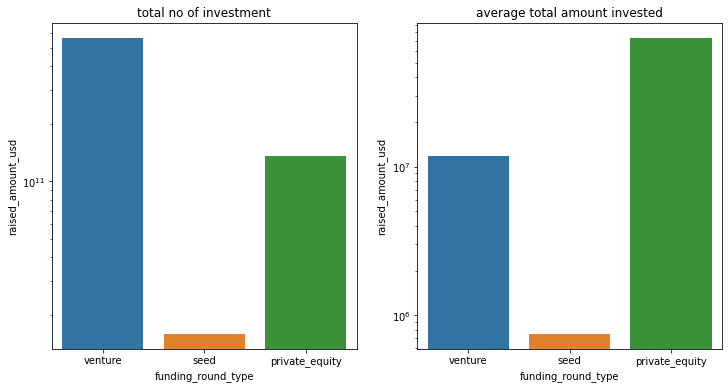

In [116]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.yscale('log')
sb.barplot(x='funding_round_type',y='raised_amount_usd',data=m,estimator=np.sum,ci=False)
plt.title('total no of investment')

plt.subplot(122)
plt.yscale('log')
sb.barplot(x='funding_round_type',y='raised_amount_usd',data=m,estimator=np.mean,ci=False)
plt.title('average total amount invested')

### plot 2

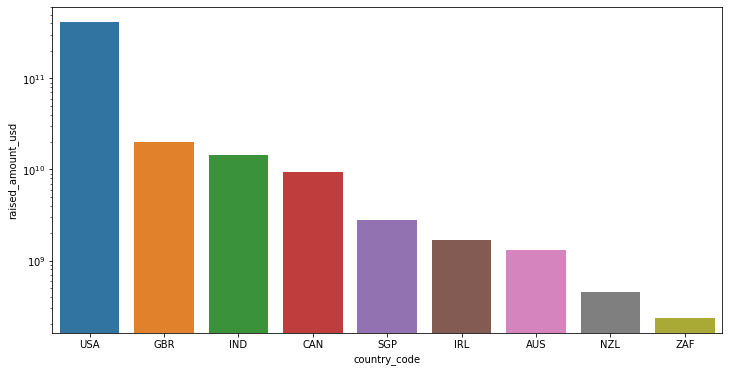

In [117]:
plt.figure(figsize=(12,6))

plt.yscale('log')
t=top9.head(9)
sb.barplot(x=t.index,y='raised_amount_usd',data=t)

### plot3

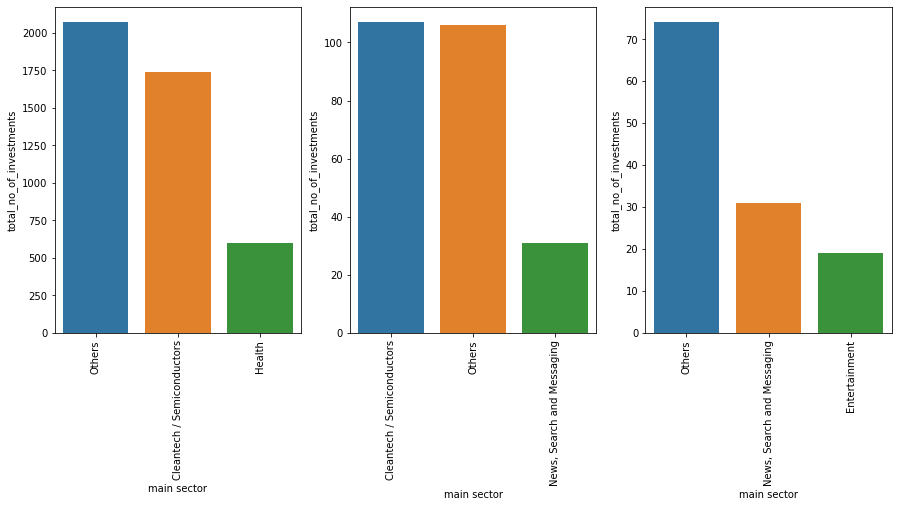

In [118]:
plt.figure(figsize=(15,6))

plt.subplot(131)
plt.xticks(rotation=90)
a=d.head(3)
sb.barplot(x=a.index,y='total_no_of_investments',data=a)

plt.subplot(132)
plt.xticks(rotation=90)
b=d2.head(3)
sb.barplot(x=b.index,y='total_no_of_investments',data=b)

plt.subplot(133)
plt.xticks(rotation=90)
c=d3.head(3)
sb.barplot(x=c.index,y='total_no_of_investments',data=c)